In [ ]:
# %pip install pandas matplotlib

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-07-18.csv (5nA)


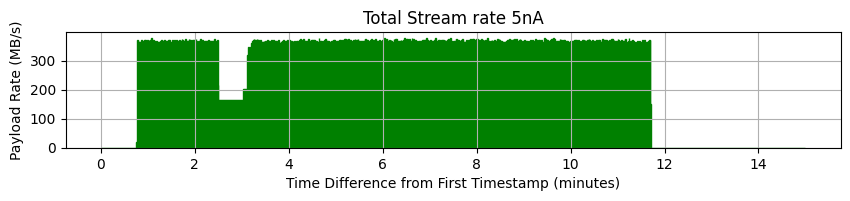

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-27-14.csv (70nA)


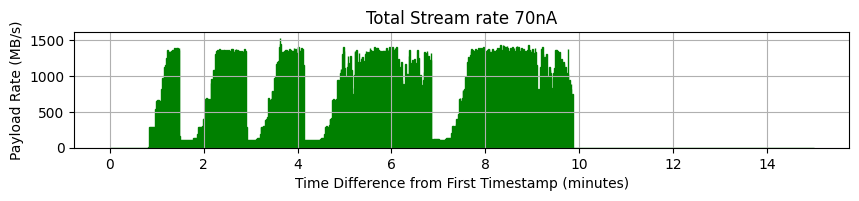

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-41-03.csv (40nA)


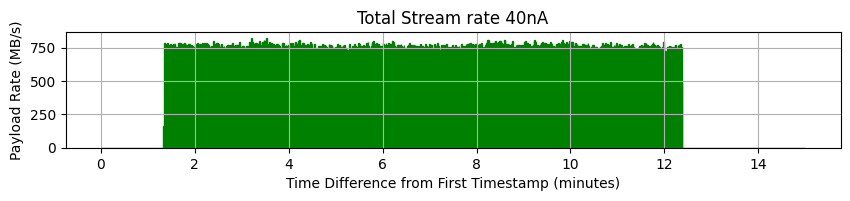

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-56-12.csv (60nA)


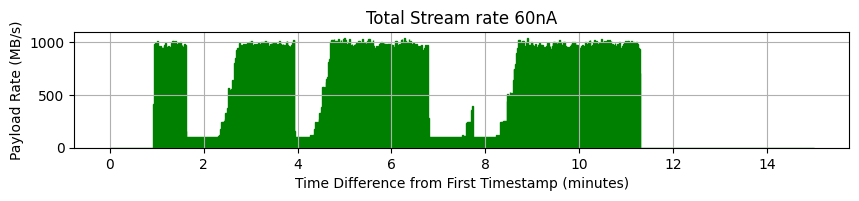

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-11-37.csv (25.1nA)


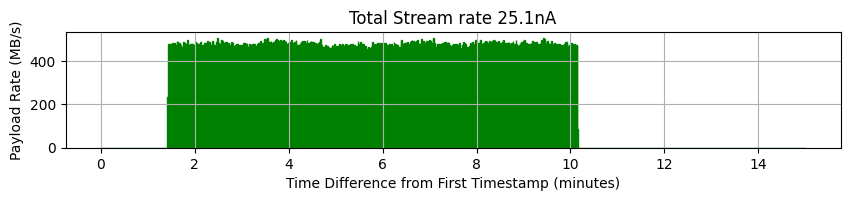

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/davidl/25nA_merged/merged.csv (25.2nA)


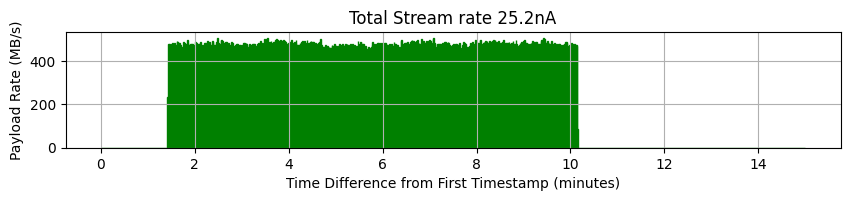

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-23-51.csv (80.1nA)


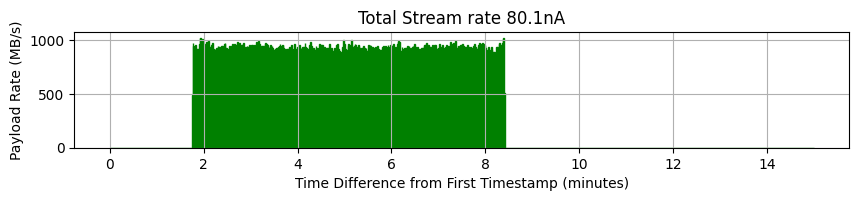

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-39-50.csv (80.2nA)


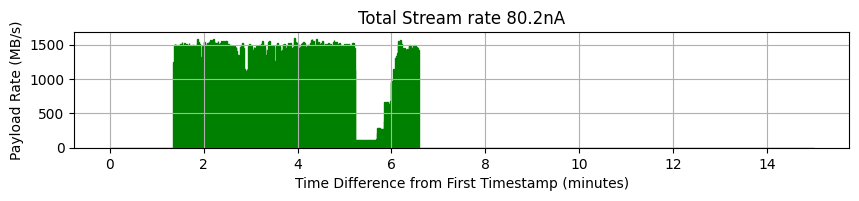

Reading input file: /nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-50-38.csv (50nA)


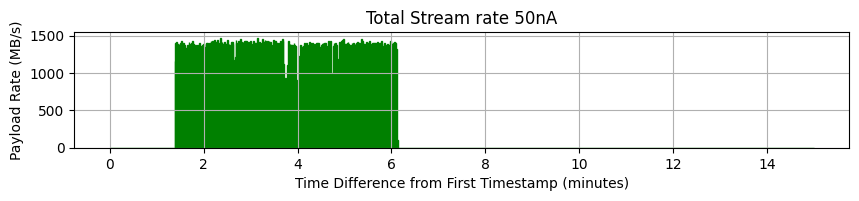

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

fnames = {}
fnames[5]  = '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-07-18.csv' #  5nA, 220.0GB
fnames[70] = '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-27-14.csv' #  70nA, 474.0GB
fnames[40] = '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-41-03.csv' #  40nA, 474.0GB
fnames[60] = '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_09-56-12.csv' #  60nA, 474.0GB
fnames[25.1] = '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-11-37.csv' #  25nA, 235.0GB
fnames[25.2] = '/nvme/proj/RTDP/2024.05.17.CLAS12/davidl/25nA_merged/merged.csv' # 25nA
fnames[80.1]= '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-23-51.csv' #  80nA, 235.0GB
fnames[80.2]= '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-39-50.csv' #  80nA, 378.0GB
fnames[50] = '/nvme/proj/RTDP/2024.05.17.CLAS12/files/CLAS12_ECAL_PCAL_DC_2024-05-16_10-50-38.csv' #  50nA, 362.0GB

for ibeam,fname in fnames.items():
    print(f"Reading input file: {fname} ({ibeam}nA)")
    df = pd.read_csv(fname)  #  5nA, 220.0GB

    # Time difference between first and last packet
    # d_total = len(df)*1.5E-3  # in MB
    # t_total = df['Timestamp'].max() - df['Timestamp'].min()
    
    # df['time_diff'] = df['Timestamp'].diff()*1E3 # Time difference between subsequent packets in milliseconds
    # df = df.dropna()
    
    # Calculate time differences from the first row's Timestamp (in minutes)
    time_diffs = (df['Timestamp'] - df['Timestamp'].iloc[0])/60.0

    # Define histogram parameters
    bin_width = 1  # seconds
    total_range = 15 * 60  # 15 minutes in seconds
    bins = int(total_range / bin_width)

    # Create the histograms
    plt.figure(figsize=(10, 1.5))
    plt.hist(time_diffs, bins=bins, range=[0.0, 15.0], weights=df['CaptureLength']/1.0E6, edgecolor='green')
    plt.title(f'Total Stream rate {ibeam}nA')
    plt.xlabel('Time Difference from First Timestamp (minutes)')
    plt.ylabel('Payload Rate (MB/s)')
    plt.grid()
    plt.show()

# # Caluculate values based on port
# df1 = {}
# t_total1 = {}
# for port in range(7001, 7024):
#     print(f"Processing port: {port}")
#     df1[port] = df[df['DestinationPort'] == port].copy()
#     df1[port]['time_diff'] = df1[port]['Timestamp'].diff()*1E3 # Time difference between subsequent packets in milliseconds
#     df1[port] = df1[port].dropna()
#     t_total1[port] = df1[port]['Timestamp'].max() - df1[port]['Timestamp'].min()

# print(f'Number of packets: {len(df)} (or about {len(df)/4.0E6:.2f}M packets per stream)')
# print(f'Total time for run: {t_total:.2f}s (={t_total/60.0:.2f}mins)')
# print(f'Total data (approx.): {d_total*1.0E-3:.2f}GB')
# print(f'Total rate (approx.): {d_total/t_total:.2f}MB/s')
# for port in range(7001, 7024):
#     print(f'  port {port}: {len(df1[port])} packets (or about {len(df1[port])*1.5E-3/t_total1[port]:.2f}MB/s)')
